# Question 1

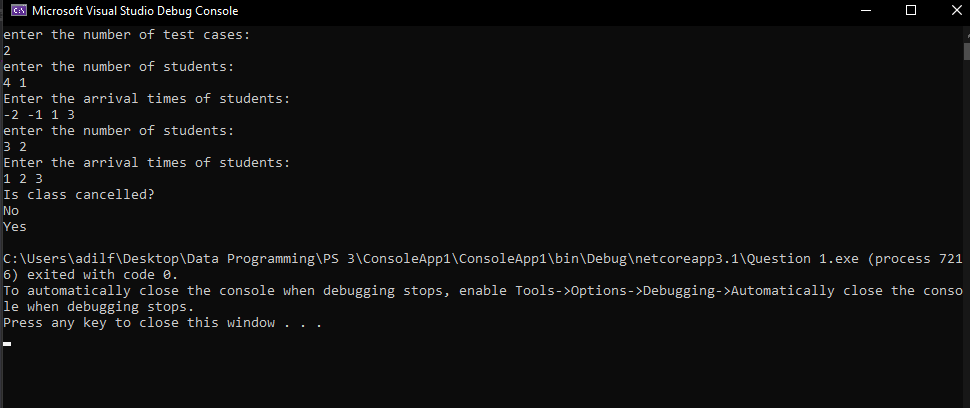

# Question 2

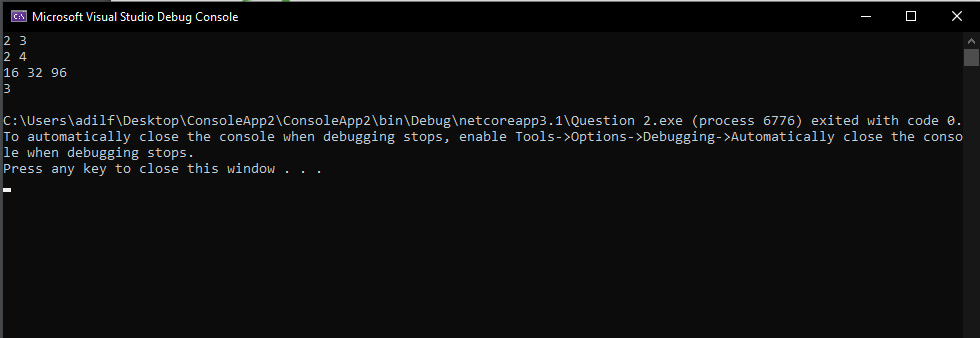

# Question 3
Housing

Step 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:

• The first a random number from 1 to 4

• The second a random number from 1 to 3

• The third a random number from 10,000 to 30,000

In [3]:
no1 = pd.Series(np.random.randint(1,5, 100))
no2 = pd.Series(np.random.randint(1,4, 100))
no3 = pd.Series(np.random.randint(10000,30001, 100))

Step 3. Create a DataFrame by joinning the Series by column

In [4]:
df_house = pd.concat([no1, no2, no3], axis=1)
df_house.head()

,0,1,2
0,4,1,21876
1,4,3,12651
2,3,3,15390
3,1,3,29355
4,1,2,13977


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [5]:
df_house.columns = [ "bedrs","bathrs","price_sqr_meter"]
df_house.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,21876
1,4,3,12651
2,3,3,15390
3,1,3,29355
4,1,2,13977


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [7]:
df_bigcolumn = df_house['bedrs'].append(df_house['bathrs'].append(df_house['price_sqr_meter']))
df_bigcolumn

0         4
1         4
2         3
3         1
4         1
      ...  
95    19254
96    21612
97    10055
98    23496
99    27436
Length: 300, dtype: int32

In [8]:
df_bigcolumn = pd.DataFrame(df_bigcolumn,columns=['bigcolumn'])
df_bigcolumn

,bigcolumn
0,4
1,4
2,3
3,1
4,1
...,...
95,19254
96,21612
97,10055
98,23496


Step 6. Ops it seems it is going only until index 99. Is it true?

In [13]:
df_house.tail()

295    19254
296    21612
297    10055
298    23496
299    27436
dtype: int32

Yes, it is true

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [12]:
df_house = pd.concat([no1, no2, no3], axis=0, ignore_index=True)
df_house.head()

0    4
1    4
2    3
3    1
4    1
dtype: int32

In [11]:
df_house.tail()

,bedrs,bathrs,price_sqr_meter
95,3,3,19254
96,4,3,21612
97,1,2,10055
98,3,3,23496
99,2,1,27436


In [10]:
df_bigcolumn.tail()

,bigcolumn
95,19254
96,21612
97,10055
98,23496
99,27436


In [9]:
df_bigcolumn.reset_index()

,index,bigcolumn
0,0,4
1,1,4
2,2,3
3,3,1
4,4,1
...,...,...
295,95,19254
296,96,21612
297,97,10055
298,98,23496


------------------

# Question 4
Wind Statistics

The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question. 
You should be able to perform all of these operations without using a for loop or other looping construct.

Step 1. Import the necessary libraries

In [44]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

In [16]:
wind_data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [17]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 770.5 KB


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index

In [18]:
def get_month_or_day(val):
    if val < 10:
        return(str(0)+str(val))
    else:
        return(str(val))

wind_data["date"] = wind_data[["Yr", "Mo", "Dy"]].apply(lambda x: str(x["Yr"])+"-"+get_month_or_day(x["Mo"])+"-"+get_month_or_day(x["Dy"]), axis=1 )
wind_data["date"] = pd.to_datetime(wind_data["date"], format="%y-%m-%d")
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [20]:
wind_data["date"].dtypes

dtype('<M8[ns]')

Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.


In [21]:
wind_data["date"] = wind_data[["Yr", "Mo", "Dy"]].apply(lambda x: "19"+str(x["Yr"])+"-"+get_month_or_day(x["Mo"])+"-"+get_month_or_day(x["Dy"]), axis=1 )
wind_data["date"] = pd.to_datetime(wind_data["date"])
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


In [22]:
wind_data.drop(["Yr", "Mo", "Dy"], axis=1, inplace=True)

Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [23]:
wind_data.set_index("date", inplace=True)
wind_data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [24]:
# Column Wise
wind_data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [26]:
# Row Wise
wind_data[wind_data.isnull().any(axis=1)]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-18,19.83,12.04,20.79,18.54,NaN,10.29,17.83,11.38,14.67,16.71,8.79,17.96
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
1961-02-19,16.17,15.59,13.70,NaN,13.50,10.96,9.62,11.83,11.58,13.67,29.63,20.54
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN
1961-03-12,NaN,13.88,16.38,10.25,14.92,13.67,17.12,13.70,16.29,15.79,20.50,22.54


Step 7. Compute how many non-missing values there are in total.

In [27]:
print(wind_data.info())
print()
print(wind_data.notnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB
None

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64


Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times

A single number for the entire dataset.

In [28]:
wind_data.mean(axis=1).mean(axis=0)

10.228284167350386

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

A different set of numbers for each location.

In [30]:
loc_stats = pd.DataFrame()
loc_stats["min"] = wind_data.min(axis=0)
loc_stats["max"] = wind_data.max(axis=0)
loc_stats["mean"] = wind_data.mean(axis=0)
loc_stats["std"] = wind_data.std(axis=0)
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

A different set of numbers for each day

In [31]:
day_stats = pd.DataFrame()
day_stats["min"] = wind_data.min(axis=1)
day_stats["max"] = wind_data.max(axis=1)
day_stats["mean"] = wind_data.mean(axis=1)
day_stats["std"] = wind_data.std(axis=1)
day_stats.head()

,min,max,mean,std
date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


Step 11. Find the average windspeed in January for each location.

Treat January 1961 and January 1962 both as January.

In [32]:
wind_data = wind_data.reset_index() 
Jan_data = wind_data[wind_data['date'].dt.month == 1]
Jan_data = Jan_data.mean(axis = 0)
Jan_data

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [33]:
wind_data.groupby(wind_data['date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
date,,,,,,,,,,,,
1961,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


Step 13. Downsample the record to a monthly frequency for each location.

In [34]:
data_mnth = wind_data
data_mnth.groupby([data_mnth['date'].dt.year.rename('year'),data_mnth['date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      445.24  359.65  416.38  239.84  321.11  266.23  346.73  277.36   
     2      455.54  419.31  389.92  249.23  387.86  306.25  332.94  331.69   
     3      326.70  350.19  333.34  218.52  325.79  274.87  298.97  304.72   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      305.69  265.50  335.36  177.16  294.20  203.82  228.12  253.49   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      281.66  313.33  430.31  455.80  
     2      331.00  356.00  520.33  431.53  
     3      298.53  348.81  508.74  471.60  
     4      220.27  217.11  334.42  308.35  
     5      249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

Step 14. Downsample the record to a weekly frequency for each location.

In [35]:
data_week = wind_data
data_week.groupby([data_week['date'].dt.year.rename('year'),data_week['date'].dt.month.rename('month'), data_week['date'].dt.week.rename('week')]).sum()

RPT     VAL     ROS    KIL     SHA     BIR     DUB  \
year month week                                                          
1961 1     1      94.79   68.92   73.41  44.92   66.32   45.05   77.43   
           2      87.28   62.77   83.71  32.41   51.46   35.51   52.75   
           3      92.43   69.04   90.88  44.30   53.80   51.92   64.80   
           4     119.28  112.99  127.58  89.04  122.03  103.80  108.70   
           5      36.42   30.97   27.63  19.88   27.50   20.08   29.38   
...                 ...     ...     ...    ...     ...     ...     ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17   41.79   51.33   
           49    145.18  134.33  119.24  68.44  107.01   89.42  101.06   
           50    117.31  102.85  104.91  48.42   79.78   50.91   71.46   
           51     78.09   56.06   92.21  28.03   54.78   44.03   54.59   
           52    104.66   82.61  112.25  45.55   67.62   60.34   95.96   

                    CLA     MUL     CLO     BEL     MAL  
year month week                                          
1961 1     1      39.70   59.04   59.48   87.37   92.67  
           2      47.74   39.99   53.00   77.88   77.17  
           3      55.13   50.02   56.87   68.75   80.04  
           4     106.12  101.36  109.48  146.51  157.71  
           5      18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...  
1978 12    48     38.84   41.71   46.54   48.76   71.40  
           49     87.42   97.09   98.58  129.62  161.43  
           50     55.77   64.18   59.96   77.72  108.94  
           51     60.67   50.06   56.51   82.92  132.84  
           52     73.34   76.08   80.30   90.63  187.91  

[1124 rows x 12 columns]

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [36]:
cal_data = data_week.groupby([data_week['date'].dt.year.rename('Year'),data_week['date'].dt.week.rename('Week')]).sum()

cal_mean = pd.Series(cal_data.head(52).mean(axis=1))
cal_min = pd.Series(cal_data.head(52).min(axis=1))
cal_max = pd.Series(cal_data.head(52).max(axis=1))
cal_std = pd.Series(cal_data.head(52).std(axis=1))

data_stats = pd.DataFrame({'Min':cal_min, 'Max':cal_max, 'Mean':cal_mean, 'Std Deviation':cal_std})
data_stats

Min     Max        Mean  Std Deviation
Year Week                                          
1961 1     39.70   94.79   67.425000      18.665854
     2     32.41   87.28   58.472500      19.037546
     3     44.30   92.43   64.831667      15.929948
     4     89.04  157.71  117.050000      19.379127
     5     57.73  117.79   82.602500      19.651171
     6     75.42  152.83  111.240833      22.031887
     7     60.50  148.17   95.247500      22.975869
     8     59.67  114.13   88.230000      16.550263
     9     54.84  124.90   79.417500      18.261704
     10    48.17  116.91   73.506667      19.789498
     11    49.59  135.45   82.294167      23.242226
     12    46.54  126.94   73.240000      21.503822
     13    43.80   97.30   70.397500      14.528849
     14    41.71   95.25   65.886667      16.798883
     15    34.63   66.38   47.919167      12.626817
     16    54.38   95.34   71.026667      13.271604
     17    33.61   70.82   52.115000      13.048908
     18    69.67  122.84   92.148333      15.562041
     19    37.07   72.95   55.750833      10.714129
     20    29.81   84.30   51.822500      16.773771
     21    22.49   81.88   49.933333      17.113453
     22    44.17   95.18   64.712500      15.169920
     23    36.50   85.75   59.213333      14.958301
     24    45.64  107.46   71.216667      18.737534
     25    38.35  121.87   70.465833      24.459895
     26    45.55  101.75   64.837500      15.215322
     27    50.54  111.91   73.070000      17.310881
     28    58.89  116.76   81.663333      17.387127
     29    19.01   58.91   37.456667      12.083577
     30    40.09   96.33   66.017500      15.953680
     31    43.67   96.32   66.127500      14.698140
     32    35.55   76.54   55.953333      12.862969
     33    60.20  109.25   87.293333      15.405967
     34    49.76  115.40   84.432500      18.544842
     35    39.50   95.65   59.061667      16.105509
     36    39.80   77.24   57.307500      13.063209
     37    73.10  139.15  101.575833      21.412518
     38    29.11   77.13   49.091667      14.411473
     39    58.59  113.46   81.450833      19.681967
     40    36.84   79.87   56.239167      15.042864
     41    46.05  106.82   67.890000      18.637243
     42    75.05  165.49  108.357500      24.567914
     43    56.61  128.83   88.034167      23.011550
     44    52.79  134.37   81.290000      22.777712
     45    29.54   76.01   52.410833      17.614695
     46    31.51  118.92   53.529167      24.744003
     47    34.79   89.13   60.280000      16.131285
     48    43.72  103.08   68.283333      19.070403
     49    60.37  121.54   92.017500      20.334799
     50    60.88  105.79   88.921667      14.774988
     51    38.62  110.30   65.210000      22.223507
     52    47.48  123.80   78.870000      25.444300

----------------------

# Question 5

Step 1. Import the necessary libraries

In [37]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from this address https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

Step 3. Assign it to a variable called chipo.

In [38]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

Step 4. See the first 10 entries

In [147]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [148]:
len(chipo.index)

4622

Step 6. What is the number of columns in the dataset?

In [149]:
chipo.shape[1]

5

Step 7. Print the name of all the columns.

In [150]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [152]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [162]:
print("most ordered:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

most ordered: Chicken Bowl


Step 10. For the most-ordered item, how many items were ordered?

In [166]:
print("most ordered:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])
print("Number of Orders:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "item_name"])

most ordered: Chicken Bowl
Number of Orders: 726


Step 11. What was the most ordered item in the choice_description column?

Step 12. How many items were orderd in total?

Step 13.

• Turn the item price into a float

• Check the item price type

• Create a lambda function and change the type of item price

• Check the item price type

In [167]:
#Step 11
print("most ordered:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

most ordered: [Diet Coke]


In [169]:
#Step 12
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))

In [170]:
#Step 13
chipo["item_price"].dtypes

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [186]:
chipo["revenue"] = chipo["quantity"] * chipo["item_price"]
print("Total Revenue: ", chipo["revenue"].sum())

Total Revenue:  39237.02


Step 15. How many orders were made in the period?

In [185]:
print("Total Orders: ", len(chipo["order_id"].unique()))

Total Orders:  1834


Step 16. What is the average revenue amount per order?

In [188]:
chipo.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

Step 17. How many different items are sold?

In [189]:
print("Total unique items: ", len(chipo["item_name"].unique()))

Total unique items:  50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.

Don't forget to label your axes!


In [39]:
#importing necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df_us_marriage = pd.read_csv(r"C:\Users\adilf\Desktop\us-marriages-divorces-1867-2014.csv") #reading the local file which is on desktop

In [42]:
df_us_marriage.shape #getting the no of rows and columns

(145, 6)

In [43]:
df_us_marriage.head() #taking a look at the first 5 rosw of the dataframe

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


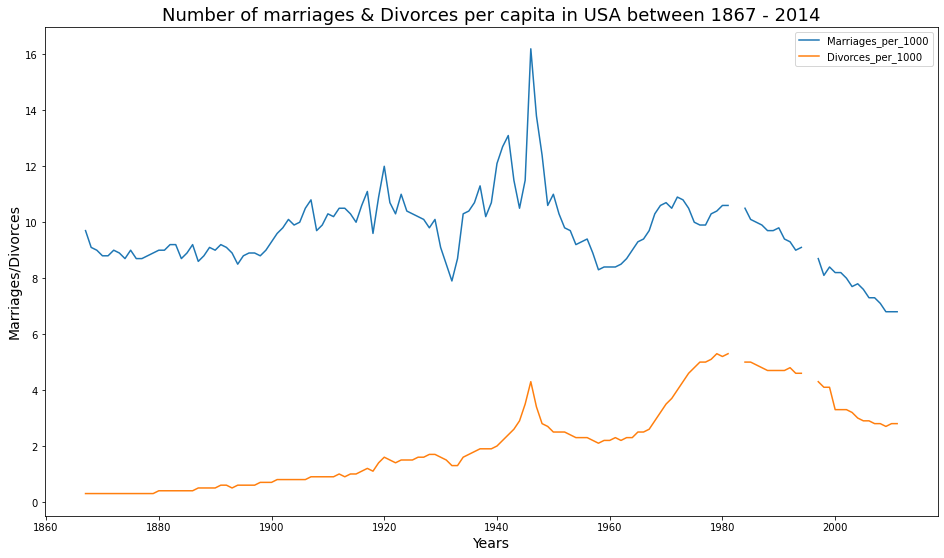

In [50]:
df_us_marriage.plot.line(x="Year", y=["Marriages_per_1000", "Divorces_per_1000"], figsize=(16,9)) #defining the plot & its size
plt.xlabel('Years', fontsize = 14) #labes for x axis
plt.ylabel('Marriages/Divorces', fontsize = 14) #labes for y axis
plt.title("Number of marriages & Divorces per capita in USA between 1867 - 2014", fontsize=18) #title label
plt.legend()
plt.show()

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.

Don't forget to label your axes!

In [ ]:
#importing necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
#we have already read the cvs file in the above question
#we stored the data in df_us_marriage dataframe hence we will be using the same dataframe
df_us_marriage #calling the df for sanity check

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [58]:
#filtering the years that are necessary
df_us_marriage2 = df_us_marriage[(df_us_marriage.Year == 1900) | (df_us_marriage.Year == 1950) | (df_us_marriage.Year == 2000)]
#dropping the unnecessary columns
df_us_marriage3 = df_us_marriage2.drop(columns = ['Marriages', 'Divorces', 'Population'])
#chaging the index to year column
df_us_marriage4 = df_us_marriage3.set_index('Year')
df_us_marriage4

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


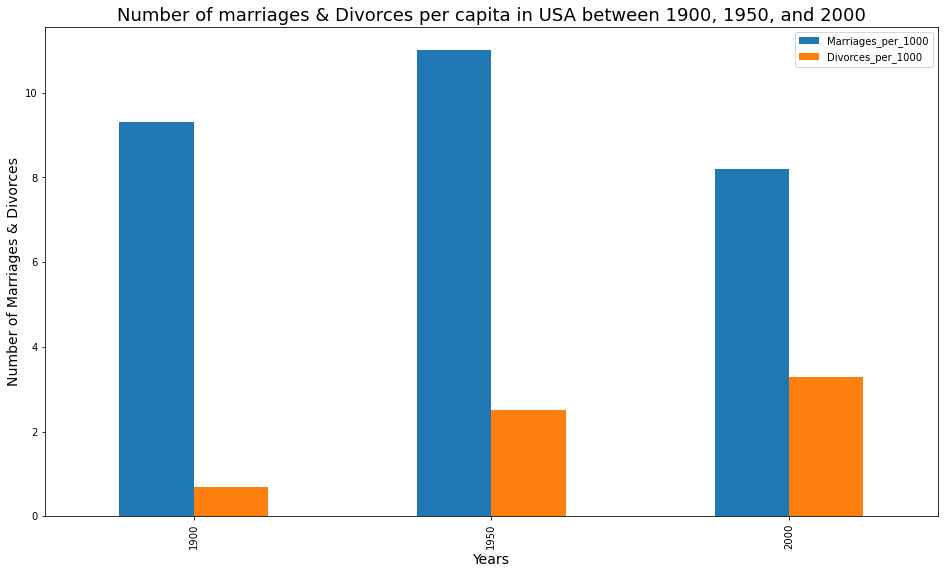

In [56]:
df_us_marriage4.plot.bar(figsize=(16,9)) #plotting the bar grap with fig size
plt.xlabel('Years', fontsize = 14) #labes for x axis
plt.ylabel('Number of Marriages & Divorces', fontsize = 14) #labes for y axis
plt.title("Number of marriages & Divorces per capita in USA between 1900, 1950, and 2000", fontsize=18) #title label
plt.legend() #plotting the legend
plt.show() #showing the graph


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.

Don't forget to label your axes!


In [ ]:
deadly_actors = pd.read_csv(r'C:\Users\adilf\Desktop\actor_kill_counts.csv') #reading the csv file from desktop folder

In [ ]:
hollywood_actors = deadly_actors.sort_values(by="Count") #sorting the dataframe with the count

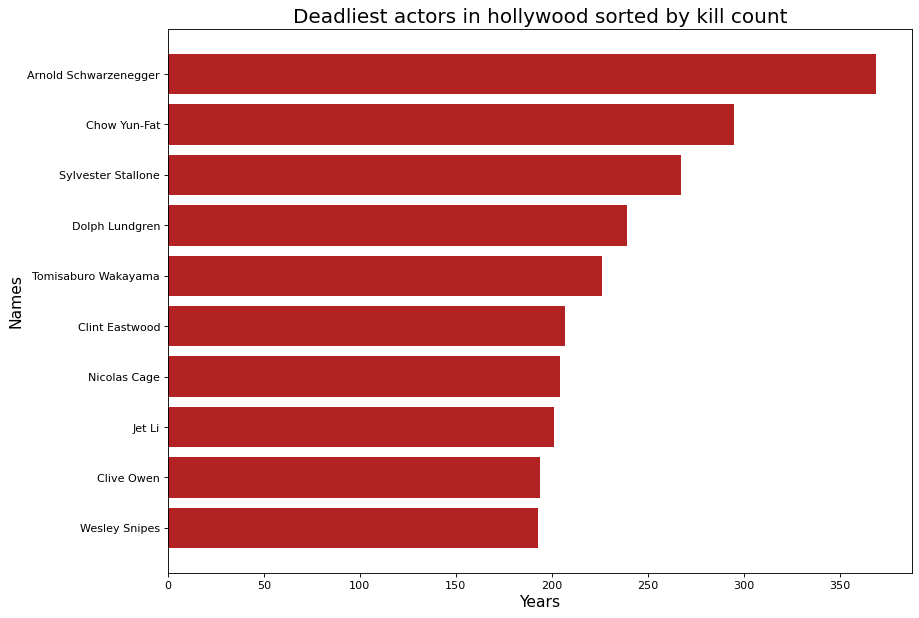

In [64]:
plt.figure(figsize=(12,9), dpi= 80) #defining the plot size
plt.barh(hollywood_actors['Actor'], hollywood_actors['Count'],  color='firebrick') #plotting a horizontal bar graph
plt.xlabel('Years', fontsize = 14) #labes for x axis
plt.ylabel('Names', fontsize = 14) #labes for y axis
plt.title("Deadliest actors in hollywood sorted by kill count", fontsize=18) #title label
plt.show() #showing the plot

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were assassinated.

Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.

In [68]:
roman_emperors = pd.read_csv(r'C:\Users\adilf\Desktop\roman-emperor-reigns.csv') #reading the local csv file on desktop folder

In [69]:
roman_emperors.head() #taking a look at the dataframe using the head function

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [70]:
assassinated_emperors = roman_emperors[roman_emperors.Cause_of_Death == 'Assassinated']

In [71]:
assassinated_emperors

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


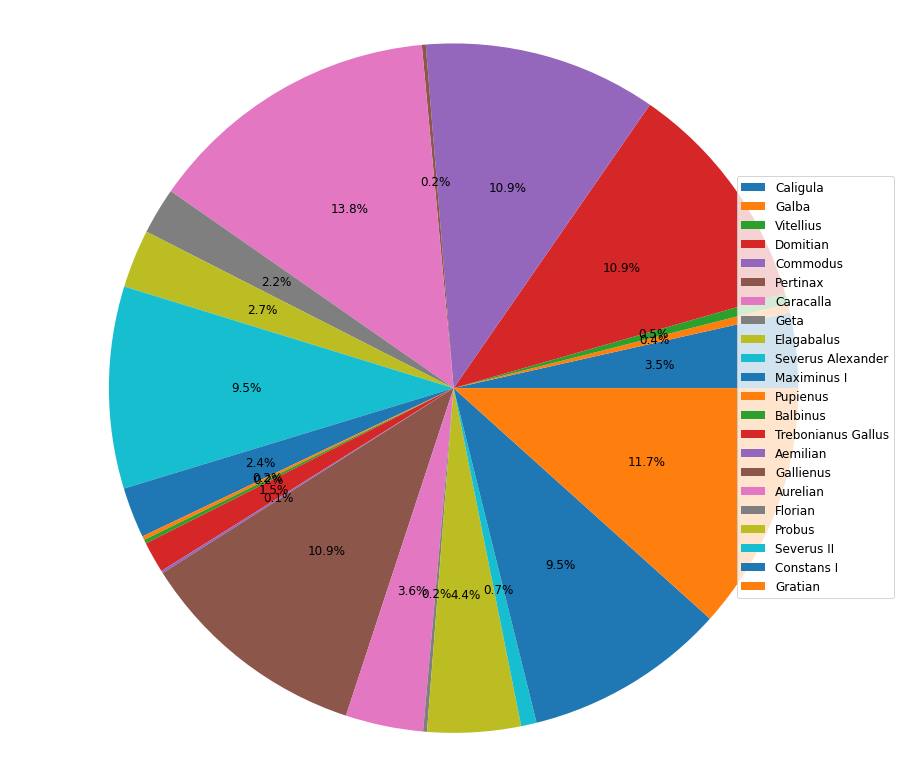

In [102]:
labels = assassinated_emperors.Emperor 
sizes = assassinated_emperors.Length_of_Reign

fig, ax = plt.subplots(figsize=(16,14))
plt.pie(sizes, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 12})
plt.axis('equal')
plt.legend( labels, loc="center right", fontsize = 12)
plt.show()

# Question: 10
Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.

Don't forget to label your axes!

Color each dot according to its year.

In [103]:
#importing the necessary libs
import seaborn as sb

In [107]:
#reading the dataset from local folder desktop
money_earned = pd.read_csv(r'C:\Users\adilf\Desktop\arcade-revenue-vs-cs-doctorates.csv')

In [109]:
money_earned

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


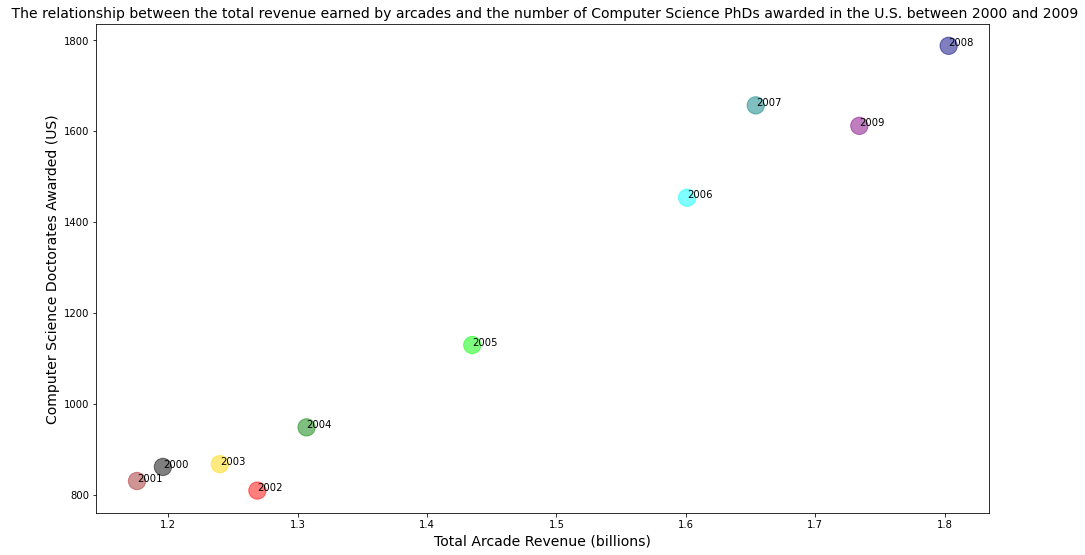

In [116]:
#defining the x axis values
x = money_earned["Total Arcade Revenue (billions)"]
#defining the y axis values
y = money_earned["Computer Science Doctorates Awarded (US)"]
#scatter value is years differentiated with colors
year = money_earned.Year
colours = ['black','brown','red','gold','green','lime','aqua','teal','navy','purple']
#defining the fig size
fig, ax = plt.subplots(figsize=(16,9))
#plotting a scatter plot using a for loop
scatter = plt.scatter(x, y, alpha=0.5, label=year, c = colours, s =300)
for i, txt in enumerate(year):
    ax.annotate(txt, (x[i], y[i]))
#defining the lables of x & y and also title of the plot
plt.xlabel('Total Arcade Revenue (billions)', fontsize = 14)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize = 14)
plt.title(' The relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009', fontsize = 14)
plt.show() #showing the plot